## Tolu Arokodare 2024/25 Season
### 30 Games, 17 Goals, 5 Assists


In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt


In [61]:
filepath = "Tolu_2024-25.csv"
df= pd.read_csv(filepath)

In [62]:
df.head(10)

,Date,Opponent,Venue,Result,Goals,Assists,Shots,Shots on Target,Minutes,xG,Key Passes,Opp_GA_per_game
0,28-Jul-24,Standard Liege,Home,0-0 (D),0,0,4,0,89,0.10,1,1.17
1,03-Aug-24,OH Leuven,Away,1-3 (L),1,0,7,1,90,0.35,0,1.10
2,11-Aug-24,Club Brugge,Home,3-2 (W),1,0,6,2,90,0.30,1,1.20
3,17-Aug-24,Beerschot,Away,4-3 (W),2,0,2,2,90,0.80,1,2.00
4,30-Aug-24,KVC Westerlo,Home,1-0 (W),0,0,4,0,90,0.20,0,1.63
5,14-Sep-24,Cercle Brugge,Away,3-2 (W),1,0,6,3,72,0.35,1,1.47
6,17-Sep-24,RSC Anderlecht,Away,2-0 (W),0,0,3,1,78,0.10,0,0.90
7,22-Sep-24,FCV Dender EH,Home,4-0 (W),1,0,7,1,75,0.50,1,1.70
8,28-Sep-24,KV Mechelen,Home,2-1 (W),0,0,1,0,59,0.15,1,1.33
9,05-Oct-24,KV Kortrijk,Away,1-2 (L),0,0,6,3,90,0.20,0,1.83


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             30 non-null     object 
 1   Opponent         30 non-null     object 
 2   Venue            30 non-null     object 
 3   Result           30 non-null     object 
 4   Goals            30 non-null     int64  
 5   Assists          30 non-null     int64  
 6   Shots            30 non-null     int64  
 7   Shots on Target  30 non-null     int64  
 8   Minutes          30 non-null     int64  
 9   xG               30 non-null     float64
 10  Key Passes       30 non-null     int64  
 11  Opp_GA_per_game  30 non-null     float64
dtypes: float64(2), int64(6), object(4)
memory usage: 2.9+ KB


In [64]:
# Convert Date to datetime format and extract features
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Match_Day'] = df['Date'].dt.day
df['Match_Month'] = df['Date'].dt.month
df['Match_Weekday'] = df['Date'].dt.weekday

In [65]:
# Step 1: Convert Goals into Binary Target Variable (1 if goals > 0, else 0)
df["Goal_Scored"] = df["Goals"].apply(lambda x: 1 if x > 0 else 0)


In [66]:
# Step 2: Drop irrelevant columns
df.drop(columns=["Date", "Opponent", "Result", "Goals"], inplace=True)

In [67]:
# Step 3: Convert Venue into numerical values (Home=0, Away=1)
df["Venue"] = df["Venue"].map({"Home": 0, "Away": 1})


In [68]:
# Step 5: Normalize numerical features
scaler = StandardScaler()
numerical_features = ["Shots", "Shots on Target", "Minutes", "xG", "Key Passes"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [69]:
# Step 6: Split data into training and testing sets
# Define Features (X) and Target (y)
X = df.drop(columns=["Goal_Scored"])  # Features (all columns except the target)
y = df["Goal_Scored"]  # Target variable (Binary: 1 if scored, 0 if not)

# Now, split the dataset into Training & Testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)


In [70]:
# Step 7: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
# Evaluate Model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

In [72]:
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Model Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



🚀 Model Performance Review
Your Logistic Regression model achieved 83% accuracy,
F1-score of 0.83 for both scoring and non-scoring predictions.

🔍 Breakdown of Results
Accuracy: 83% → The model correctly predicts whether the player will score in 83% of cases.
Precision (0.83 for both classes) → When the model predicts a goal (1), it's correct 83% of the time.
Recall (0.83 for both classes) → The model correctly identifies 83% of actual goals.
Balanced Classes → Equal support (6 games each) in the test set means no imbalance issues.


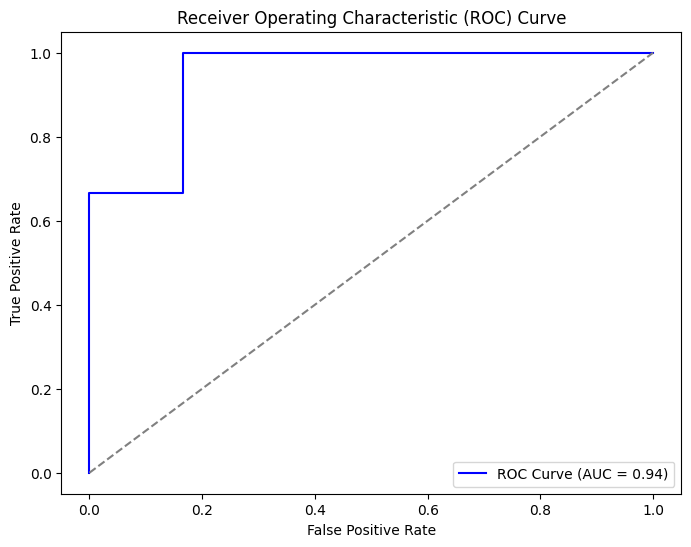

In [73]:
# Step 11: Plot ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

In [74]:
print(roc_auc)

0.9444444444444444
